In [4]:
import numpy as np

In [112]:
class FuzzyCMeans():
    def __init__(self, numOfClusters, m = 2, E = 0.01, random_state=42):
        self.numOfClusters = numOfClusters
        self.random_state = random_state
        self.m = m
        self.E = E

    def init_member_matrix(self, X):
        np.random.seed(self.random_state)

        M = np.random.rand(self.numOfClusters, len(X))
        M = M / np.sum(M, axis=0)

        return np.round(M)

    def calc_centroids(self, X, M):
        centroids = np.zeros((self.numOfClusters, len(X[0])))
        for k in range(self.numOfClusters):
            currX = X[:, 0]
            currM = M[k, :]
            centroids[k] = np.sum(currX * currM ** self.m) / np.sum(currM ** self.m)
        return centroids

    def compute_distances(self, X, centroids):
        distances = np.zeros((self.numOfClusters, len(X)))
        for k in range(self.numOfClusters):
            distances[k] = np.linalg.norm(X - centroids[k], axis=1)
        return distances

    def update_membership_matrix(self):
        M = np.zeros((self.numOfClusters, len(self.X)))
        for k in range(self.numOfClusters):
            for i in range(len(self.X)):
                M[k, i] = 1 / np.sum([np.power(self.distances[k, i] / self.distances[j, i], 2 / (self.m - 1)) for j in range(self.numOfClusters)])
        return M


    def fit(self, X):
        self.X = X
        self.M = self.init_member_matrix(self.X)
        self.centroids = self.calc_centroids(self.X, self.M)

        for i in range(100):
            old_centroids = self.centroids
            self.distances = self.compute_distances(self.X, self.centroids)
            new_M = self.update_membership_matrix()
            error = np.max(new_M - self.M)
            if error < self.E:
                break
            self.M = new_M
            self.centroids = self.calc_centroids(self.X, self.M)



In [122]:
n_samples = 100

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

In [123]:
fCmeans = FuzzyCMeans(2)
fCmeans.fit(X)

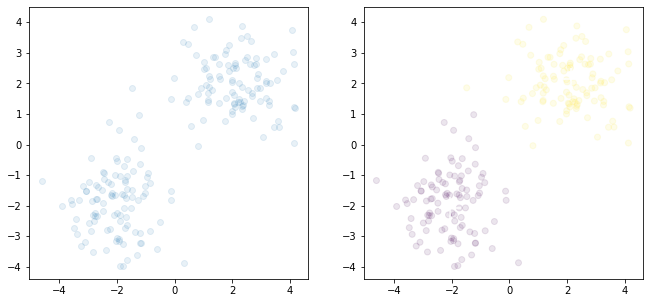

In [124]:
from matplotlib import pyplot as plt
# outputs
fcm_centers = fCmeans.centroids
fcm_labels = np.int16(np.round(fCmeans.M[0]))

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()